Please hand in this completed notebook before next lab by uploading it to blackboard.

<font color="red"><em> Vineet Kamat </em></font>

Run the following cell by pressing shift-enter.  Answer the questions marked in <font color="red">red</font>.

In [2]:
%pylab inline
from __future__ import division 

Populating the interactive namespace from numpy and matplotlib


## Model

In lecture (and in your homework) you have modelled the Ammonia molecule by two amplitudes:  $\psi_L$ is the amplitude for the Nitrogen atom to be on the left, and $\psi_R$ is the amplitude for it to be on the right.  We argued by symmetry that

$$ i\partial_t \left(\begin{array}{c}\psi_L(t)\\\psi_R(t)\end{array}\right)=
\left(\begin{array}{cc}a&b\\ b&a\end{array}\right)\left(\begin{array}{c}\psi_L(t)\\\psi_R(t)\end{array}\right),$$

It turns out that $a$ is irrelevant to the dynamics.  We can get rid of it by taking $\psi\to e^{-i a t} \psi$.  Further, we can always choose our unit of time so that $b=-1$.  Thus in the first part of this notebook we will solve  

$$ i\partial_t \left(\begin{array}{c}\psi_L(t)\\\psi_R(t)\end{array}\right)=
\left(\begin{array}{cc}0&-1\\ -1&0\end{array}\right)\left(\begin{array}{c}\psi_L(t)\\\psi_R(t)\end{array}\right),$$

This is a simple enough equation that we can solve it analytically, but we want to develop numerical tools.  In particular, we will discretize time, and use a finite difference approximation.

To make the notation nice, I will write $$\vec\psi(t)=\left(\begin{array}{c}\psi_L(t)\\\psi_R(t)\end{array}\right),$$ and $$H=\left(\begin{array}{cc}0&-1\\ -1&0\end{array}\right)$$

In the last recitation you were introduced to finite differences in space.  Next recitation you will combine the two techniques, and look at finite differences in both space and time.

In the last two homeworks you saw a couple useful finite difference schemes.

$$ \mbox{ Euler:}\quad i\frac{\vec\psi(t+\delta t)-\vec \psi(t)}{\delta t}= H\vec\psi(t)$$

$$\mbox{ Backwards Euler:}\quad i\frac{\vec\psi(t+\delta t)-\vec \psi(t)}{\delta t}= H\vec\psi(t+\delta t)$$

You saw in your homework that neither of these conserve probability:  The normalization of $\vec \psi$ gets messed up.  The simplest finite difference approximation which does not mess up the normalization is the Unitary (or Semi-Implicit) Euler method:

$$\mbox{ Unitary Euler:}\quad i\frac{\vec\psi(t+\delta t)-\vec \psi(t)}{\delta t}= H\left(\frac{\vec\psi(t+\delta t)+\vec\psi(t)}{2}\right)$$

<font color="red">Rewrite this equation so that $\psi(t+\delta t)$ appears on the left, and $\psi(t)$ on the right.  Double click on this cell, and fill in the ??? in the equation 
$$\left(1+\frac{i H \delta t}{2}\right)\vec\psi(t+\delta t)= \left(1-\frac{i H \delta t}{2}\right)\vec\psi(t)$$
</font>

By inverting the matrix $(1+i H \delta t/2)$, one can write $$ \vec\psi(t+\delta t)=U\vec\psi(t)$$ where $U$ is a $2\times 2$ matrix.  

We can write $U$ as the product of two matrices

$$U=\left(1+i H \delta t/2\right)^{-1} \left(1-i H \delta t/2\right)$$

<font color="red"> Edit the following equation, replacing $a,b,c,d$ with expressions involving $\delta t$, $i$, and numerical factors.
$$
(1+i H \delta t/2)=\left(\begin{array}{cc} 1 & i\delta t/2 \\ i\delta t/2 & 1 \end{array}\right)
$$
</font>

<font color="red"> Edit the following equation, replacing $e,f,g,h$ with expressions involving $\delta t$, $i$, and numerical factors.
$$
(1-i H \delta t/2)=\left(\begin{array}{cc} 1 & -i\delta t/2 \\ -i\delta t/2 & 1 \end{array}\right)
$$
</font>

In Python one can build matrices with the following notation -- hit shift-enter on that cell

In [3]:
U1= array([[1,2],[3,4]])

You can see the matrix by just typing the name of it and shift-enter

In [12]:
U1

array([[1, 2],
       [3, 4]])

Better yet, you can load the showmat package

In [13]:
from showmat import showmat
showmat(U1)

1,2
3,4


You can invert matrices using the following notation

In [14]:
Uinv1=inv(U1)
showmat(Uinv1)

-2,1
1.5,-0.5


We can verify that this is indeed the inverse by taking the matrix product

In [15]:
Uinv1.dot(U1)

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

In Python, you can define complex numbers using a lower case $j$, such as

In [16]:
(3.+2.j)*(1-1j)

(5-1j)

While there are ways to make Python work symbolically (like Mathematica) we will work only with numerical matrices in this part of the course.  Thus we need a function which generates $U$, given $\delta t$.

Replace the a,b,c,d,e,f,g,h in the following function

In [17]:
def U(dt):
    """ U(dt) generates a 2x2 matrix which evolves the wavefunction for Ammonia by a time dt. 
    We use units where the level spacing is unity."""
    mat1=array([[1,(1j/2)*dt],[(1j/2)*dt,1]]) # this should be 1+i H dt/2
    mat2=array([[1,-(1j/2)*dt],[(-1j/2)*dt,1]]) # this should be 1-i H dt/2
    U=inv(mat1).dot(mat2)
    return U

Test it with the following code

In [24]:
U2=U(0.1)
U2

array([[0.99501247+0.j        , 0.        -0.09975062j],
       [0.        -0.09975062j, 0.99501247+0.j        ]])

<font color=red>Look up on Google how to take the determinent of U2.  Calculate the determinent. </font>

In [28]:
def detTwoByTwo(U):
    a = U[0][0]*U[1][1]-U[0][1]*U[1][0]
    return a
detTwoByTwo(U2)

(1.0000000000000002+0j)

In [29]:
inv(U2)

array([[0.99501247+0.j        , 0.        +0.09975062j],
       [0.        +0.09975062j, 0.99501247+0.j        ]])

In [32]:
U2.dot(inv(U2))

array([[1.+0.00000000e+00j, 0.+0.00000000e+00j],
       [0.-2.77555756e-17j, 1.+0.00000000e+00j]])

<font color="red">Is the matrix U Unitary, Hermitian, AntiHermitian, none of these?</font>  Multiplying U2 by U2 transpose gives us I so U is unitary but not hermitian because the transpose conjugate is not equal to itself

## Time Evolution

To calculate the time evolution, we simply need to repeatedly multiply by this matrix.  For that we need "loops."  Here is a little "program" which calculates a time-sequence of wavefunctions.  [One could encapsulate this into a function, but I find many students are more comfortable simply copying and pasting code blocks like this one.]

In [61]:
dt=0.1  # set timestep
evolve = U(dt) # generate matrix which evolves in time
psi0=array([1,0]) # initial condition
maxt= 10 # what number to integrate to

t=0
psi=psi0

tlist=[t]
psilist=[psi]

while (t<maxt):
    t=t+dt
    psi=evolve.dot(psi)
    tlist.append(t)
    psilist.append(psi)
    
psiarray=array(psilist) # convert to more convenient container

Here is an example of Plotting the probability of the Nitrogen being on the left

Text(0.5,1,'Probability of being on left')

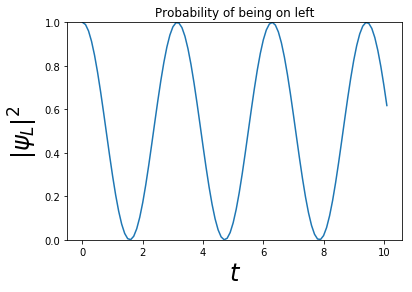

In [62]:
plot(tlist,abs(psiarray[:,0])**2)
ylabel("$|\psi_L|^2$",fontsize=24)
xlabel("$t$",fontsize=24)
ylim(0,1)
title("Probability of being on left")

An important question is how small to take our step-size.  Modify the following code to produce a stepsize of dt=0.01.  

In [63]:
dt=0.01  # set timestep -- you need to modify this line
evolve = U(dt) # generate matrix which evolves in time
psi0=array([1,0]) # initial condition
maxt= 10 # what number to integrate to

t=0
psi=psi0

tlist2=[t]
psilist2=[psi]

while (t<maxt):
    t=t+dt
    psi=evolve.dot(psi)
    tlist2.append(t)
    psilist2.append(psi)
    
psiarray2=array(psilist2) # convert to more convenient container

The following code makes a plot which compares the results for dt=0.1 and dt=0.01

Text(0.5,1,'Probability of being on left')

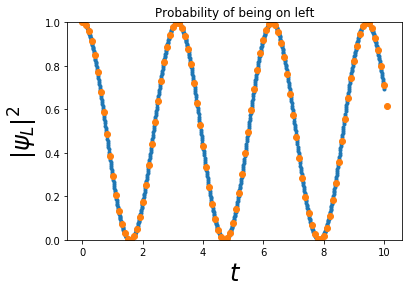

In [64]:
plot(tlist2,abs(psiarray2[:,0])**2,".")
plot(tlist,abs(psiarray[:,0])**2,"o")
ylim(0,1)
ylabel("$|\psi_L|^2$",fontsize=24)
xlabel("$t$",fontsize=24)
title("Probability of being on left")

Comment on the accuracy of the $dt=0.1$ result

<font color="red"> The results are fairly similar.  The tim evolution follows almost perfectly for both graphs </font>

In the cells below, repeat the dt=0.1 calculation, but with the initial state being $|+\rangle=(1/\sqrt{2},1/\sqrt{2})$.  For obvious reasons, we call $|+\rangle$ a "stationary state".  <em> Note, your plot will look funny unless you include the command <tt>ylim(0,1)</tt> which sets the y-axis range.  The plotting functions sometimes have difficulty with automatically choosing the range </em>

In [65]:
dt=0.1  # set timestep
evolve = U(dt) # generate matrix which evolves in time
psi0=array([1/np.sqrt(2),1/np.sqrt(2)]) # initial condition
maxt= 10 # what number to integrate to

t=0
psi=psi0

tlist=[t]
psilist=[psi]

while (t<maxt):
    t=t+dt
    psi=evolve.dot(psi)
    tlist.append(t)
    psilist.append(psi)
    
psiarray=array(psilist) # convert to more convenient container

Text(0.5,1,'Probability of being on left')

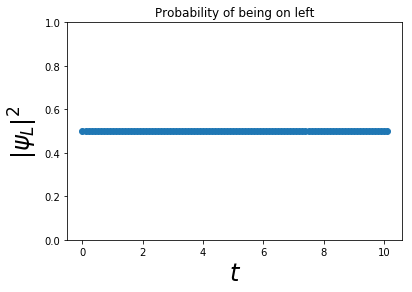

In [66]:
plot(tlist,abs(psiarray[:,0])**2,"o")
ylim(0,1)
ylabel("$|\psi_L|^2$",fontsize=24)
xlabel("$t$",fontsize=24)
title("Probability of being on left")

## Stimulated Absorption and Emission

In the presence of a microwave field, the equations of motion become

$$ i\partial_t \left(\begin{array}{c}\psi_L(t)\\\psi_R(t)\end{array}\right)=
\left(\begin{array}{cc}E(t)&-1\\ -1&-E(t)\end{array}\right)\left(\begin{array}{c}\psi_L(t)\\\psi_R(t)\end{array}\right),$$

where $E(t)=\epsilon \cos(\omega t)$.

Now that $H$ is time dependent, the generalization of the Unitary Euler method is

$$i\frac{\vec\psi(t+\delta t)-\vec \psi(t)}{\delta t}= H(t+\delta t/2)\left(\frac{\vec\psi(t+\delta t)+\vec\psi(t)}{2}\right)$$

This can be rewritten as

$$\psi(t+\delta t)= U(t) \psi(t)$$

<font color="red"> Edit the following equation, replacing $a,b,c,d,e,f,g,h$ with expressions involving $\delta t$, $i$, $E$ (which is shorthand for $E(t+\delta t/2)$ and numerical factors.
$$
U(t)=\left(\begin{array}{cc} 1+(i\delta t/2)(\epsilon cos(\omega(t+\delta t))) & -1 \\ -1 & 1-(i\delta t/2)(\epsilon cos(\omega(t+\delta t))) \end{array}\right)^{-1} \left(\begin{array}{cc} 1-(i\delta t/2)(\epsilon cos(\omega(t+\delta t))) & 1 \\ 1 & 1+(i\delta t/2)(\epsilon cos(\omega(t+\delta t))) \end{array}\right)
$$
</font>

Make a function which generates this $U$

In [70]:
def drivenU(dt,E,w):
    """ U(dt,E) generates a 2x2 matrix which evolves the wavefunction for Ammonia by a time dt
    in the presence of an oscillating electric field.  The quantity E, should be the electric field
    at time t+dt/2.
    We use units where the level spacing is unity."""
    mat1=array([[1+(1j*dt*E/2)*cos(w*(t+dt)),-1],[-1,1-(1j*dt*E/2)*cos(w*(t+dt))]]) # this should be 1+i H dt/2
    mat2=array([[1-(1j*dt*E/2)*cos(w*(t+dt)),1],[1,1+(1j*dt*E/2)*cos(w*(t+dt))]]) # this should be 1-i H dt/2
    U=inv(mat1).dot(mat2)
    return U

Test your function.

In [71]:
drivenU(.01,.1,1)

array([[13344290.82457543+5.16609946e+03j,
        13344291.82457543+2.93208177e-06j],
       [13344291.82457543+2.93208177e-06j,
        13344290.82457543-5.16609946e+03j]])

In [72]:
detTwoByTwo(drivenU(.01,.1,1))

(1+3.2010137260840565e-06j)

Write a little loop, which calculates the time evolution of the ammonia atom starting in the ground state $|+\rangle=(1/\sqrt{2},1/\sqrt{2})$.  Take $E=\epsilon \cos(\omega t)$ with $\epsilon=0.1$ and $\omega=1$.  This is off-resonant, and you should find very little stimulated absorption (at best a few percent).  You will have to generate $U$ inside your loop, as it is different at each time slice.  Use $dt=0.1$, and integrate to time $t=100$.  Plot the probability of being in the ground state $P_g=| \psi_L/\sqrt{2}+\psi_R/\sqrt{2}|^2$.  Label your graph.

In [73]:
dt=0.1  # set timestep
evolve = drivenU(dt,.1,1) # generate matrix which evolves in time
psi0=array([1/np.sqrt(2),1/np.sqrt(2)]) # initial condition
maxt= 100 # what number to integrate to

t=0
psi=psi0

tlist=[t]
psilist=[psi]

while (t<maxt):
    t=t+dt
    psi=evolve.dot(psi)
    tlist.append(t)
    psilist.append(psi)
    
psiarray=array(psilist) # convert to more convenient container

/Users/vineetkamat/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in square
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Probability of being on left')

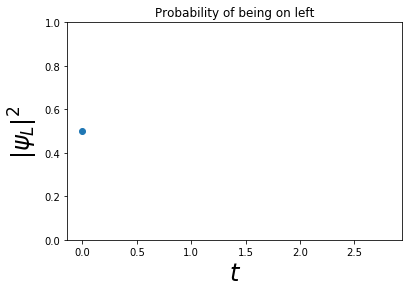

In [74]:
plot(tlist,abs(psiarray[:,0])**2,"o")
ylim(0,1)
ylabel("$|\psi_L|^2$",fontsize=24)
xlabel("$t$",fontsize=24)
title("Probability of being on left")

Repeat with a resonant drive, where $\omega=2$.

In [75]:
dt=0.1  # set timestep
evolve = drivenU(dt,.1,2) # generate matrix which evolves in time
psi0=array([1/np.sqrt(2),1/np.sqrt(2)]) # initial condition
maxt= 100 # what number to integrate to

t=0
psi=psi0

tlist=[t]
psilist=[psi]

while (t<maxt):
    t=t+dt
    psi=evolve.dot(psi)
    tlist.append(t)
    psilist.append(psi)
    
psiarray=array(psilist) # convert to more convenient container

/Users/vineetkamat/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in square
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Probability of being on left')

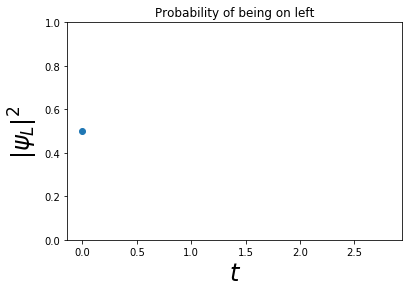

In [76]:
plot(tlist,abs(psiarray[:,0])**2,"o")
ylim(0,1)
ylabel("$|\psi_L|^2$",fontsize=24)
xlabel("$t$",fontsize=24)
title("Probability of being on left")